In [2]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import matplotlib.pyplot as plt

import sys

import Frog
import Frog.toolbox as toolbox
import Frog.frog_data_analysis as frog_data_analysis

import pickle
import time
from scipy.optimize import curve_fit


# Load the results

In [3]:
# The directory where is located the FROG results:
FROG_WD = "/home/dbissuel/Documents/ILM/TheoChem/Claire/Guillaume/Frog"
#directory = '/home/glebreton/Software/Frog/Doc/Tutorial_files/Get_started_tuto'
directory = f'{FROG_WD}/Tutorials/Get_started_tuto'

# To load the result, use: 
# GP, L_moleculetype_result = frog_data_analysis.load_result(directory)

# There are also 2 optional arguments:
# name_result: [string] optional argument, the name of the MT results. By default set to 'L_moleculetype_result.p'
# what_to_print: [list of string] optional argument, by default set to False. 
# Used to print some information about the general parameter run or relative to the diagrams. 
# Use: ['general info'] for more information about the GP, and ['diagram info'] for diagram information.
# You can combine them using: ['general info', 'diagram info']

GP, L_moleculetype_result = frog_data_analysis.load_result(directory, name_result='L_moleculetype_result.p', what_to_print=['general info', 'diagram info'])

Loading the results from the directory: /home/dbissuel/Documents/ILM/TheoChem/Claire/Guillaume/Frog/Tutorials/Get_started_tuto the MT resulting list is supposed to be called: L_moleculetype_result.p according to the "name_result" optional argument.

Succesfull loading!

######################## Some general information: ########################

The MD topology (GP.MD_file_name_topology) and trajectory (GP.MD_file_name_traj) files used are:  ../Traj/Tuto_get_strated/system.data ../Traj/Tuto_get_strated/traj_get_strated.dcd
The number of time step is (GP.nbr_time_step):  10
The number of MD frame skipped between 2 treated ones is (GP.trotter_step):  3
Here is the list of the available MT:  ['Water_TIP4P2005']
Here are the typical dimension of the simulation box in the x,y,z directions (GP.box_size):  [ 34.5  34.5 150. ]



############## Some information about the diagram available: ##############

Here is the list of the available MT:  ['Water_TIP4P2005']
For every MT, here are the ava

/home/dbissuel/Documents/ILM/TheoChem/Claire/Guillaume/Frog/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# If you want some information about your results:
frog_data_analysis.print_general_info(GP, L_moleculetype_result)
frog_data_analysis.print_diagram_info(GP, L_moleculetype_result)


######################## Some general information: ########################

The MD topology (GP.MD_file_name_topology) and trajectory (GP.MD_file_name_traj) files used are:  ../Traj/Tuto_get_strated/system.data ../Traj/Tuto_get_strated/traj_get_strated.dcd
The number of time step is (GP.nbr_time_step):  10
The number of MD frame skipped between 2 treated ones is (GP.trotter_step):  3
Here is the list of the available MT:  ['Water_TIP4P2005']
Here are the typical dimension of the simulation box in the x,y,z directions (GP.box_size):  [ 34.5  34.5 150. ]



############## Some information about the diagram available: ##############

Here is the list of the available MT:  ['Water_TIP4P2005']
For every MT, here are the available diagram:
MT:  Water_TIP4P2005
name of the diagram, population
density_slice_z 17000
molecular_orientation_slice_z 17000
chi_slice_z 17000




# Load a diagram: 

To load a diagram, use the function `frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)`

Where `GP` and `L_moleculetype_result` refers to the values previously load using the function frog_data_analysis.load_result

The `MT_name` is the name of the MT to load. It has to be one of the available one. The name_diagram is the name of the diagram to load.

To see the available MT and diagram, use:

```python
frog_data_analysis.print_general_info(GP, L_moleculetype_result)
frog_data_analysis.print_diagram_info(GP, L_moleculetype_result)
```

## Advance user

To do the same, use:

```python
my_diagram = getattr(L_moleculetype_result[k], name_diagram)
```

Where k refers to the MT you are looking for. The order of the MT is the same as the one defined in the parameter file. To check:

```python
for k in range(0, len(L_moleculetype_result), 1):
    print(k, L_moleculetype_result[k].name)
```    

To get the available diagrams:

```python
KKK = 0 # the target MT
for k in range(0, len(L_moleculetype_result[KKK].mtparameter.dparameter.L_diagram), 1):
    diagram_name = L_moleculetype_result[KKK].mtparameter.dparameter.L_diagram[k].name
    my_diagram = getattr(L_moleculetype_result[KKK], diagram_name)
    print(diagram_name, my_diagram.name)
```

In [5]:
for KKK in range(0, len(L_moleculetype_result), 1):
    print(KKK, L_moleculetype_result[KKK].name)

KKK = 0 # the target MT
for k in range(0, len(L_moleculetype_result[KKK].mtparameter.dparameter.L_diagram), 1):
    diagram_name = L_moleculetype_result[KKK].mtparameter.dparameter.L_diagram[k].name
    my_diagram = getattr(L_moleculetype_result[KKK], diagram_name)
    print(diagram_name, my_diagram.name)

0 Water_TIP4P2005
density_slice_z density_slice_z
molecular_orientation_slice_z molecular_orientation_slice_z
chi_slice_z chi_slice_z


# Usefull properties and tips 

When dealing with a diagram, here are some usefull line that you can use:

In [6]:
# Loading the diagram
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

# To check the diagram:
print('diagram name:', my_diagram.name)
print('diagram type:', type(my_diagram))
print('diagram size:', my_diagram.size) # equivalent to my.diagram.value.shape, using here the numpy built-in function ''shape''. 
print('diagram population:', my_diagram.population)
# print('diagram axis_population (if there is one):', my_diagram.axis_population)

# To have access to its diagram parameter object:
for KKK in range(0, len(L_moleculetype_result), 1): # finding the MT 
    if L_moleculetype_result[KKK].name == MT_name:
        K_MT = KKK

for k in range(0, len(L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram), 1): # finding the sdparameter relative to the diagram asked
    diagram_name = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k].name
    if diagram_name == name_diagram:
        my_diagram_sdparameter = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k]

print('Here is the sdparameter:', type(my_diagram_sdparameter), my_diagram_sdparameter.name)

# You can then show some properties of the sdparameter:
print('sdparameter type of analysis:', my_diagram_sdparameter.analysis_type)
print('sdparameter discretization type:', my_diagram_sdparameter.discretization_type)
print('sdparameter size:', my_diagram_sdparameter.bin_size)
print('sdparameter mean size (if there is one):', my_diagram_sdparameter.mean_size)    

diagram name: density_slice_z
diagram type: <class 'Frog.class_Diagrams.Dia_density'>
diagram size: (100,)
diagram population: 17000
Here is the sdparameter: <class 'Frog.class_DiagramParameter.SingleDiagramParameter'> density_slice_z
sdparameter type of analysis: density
sdparameter discretization type: 2
sdparameter size: (100,)
sdparameter mean size (if there is one): False


In order to plot the diagram values, axis have been made for you. 

To get the axis, use: 

* `my_diagram.axis_space` for the space-discretization axis
* `my_diagram.axis_observable` for the observable one

The axis_space contains the `axis_space.value` and `axis_space.unit` which are a list ready for plotting and the unit used respectively. The axis depend on the type of space-discretization used. 

* Averaged: 
> No space discretization is used. Therefore thus axis is not usefull.

* Plane_ij: 
> The space discretization is made along the laboratory axis k. The axis_space.value is a list of N elements (N being the number of bin you have defined to discretize the space). You can check this N by: `my_diagram.size[0]`, `my_diagram_sdparameter.bin_size[0]` and `len(my_diagram.axis_space.value)`. The values goes though the box size widith in the discretization direction using N values. 
> Please note that the box size evolution during the simulation is taken into account in the molecule's attribution to each slices. However, the `my_diagram.axis_space.value` is made using the first frame. 

* Layer:
> The space discretization is made over the layer attribution using the module pytim. See the tutorial about this scheme for more details. In short, my_diagram.axis_space contains the layer numbering for this diagram. If 4 layer are used for this diagram, my_diagram.axis_space goes from -4 to 4 (9 elements in total). 

The unit are built in by Frog. To show the unit of an axis, use: `axis.unit.print_unit()`
You can change the unit for a diagram, see below. 

In [7]:
# In the Plane_ij case: 
L_xyz = ['x', 'y', 'z'] # my_diagram_sdparameter.discretization_type stores the discretized laboratory axis using this correspondance 
print('The number of bin used to discretize the ' + L_xyz[my_diagram_sdparameter.discretization_type] + 'laboratory axis is:',
      my_diagram.size[0])
print('Note that these values are the same:', my_diagram.size[0], my_diagram_sdparameter.bin_size[0], len(my_diagram.axis_space.value))
print('The box size in the ' + L_xyz[my_diagram_sdparameter.discretization_type] + 'laboratory axis is', GP.box_size[my_diagram_sdparameter.discretization_type])
print('The my_diagram.axis_space.value is:', my_diagram.axis_space.value)
print('The my_diagram.axis_space unit is:', my_diagram.axis_space.unit.print_unit())


The number of bin used to discretize the zlaboratory axis is: 100
Note that these values are the same: 100 100 100
The box size in the zlaboratory axis is 150.0
The my_diagram.axis_space.value is: [  0.          1.5151515   3.030303    4.5454545   6.060606    7.5757575
   9.090909   10.60606    12.121212   13.636364   15.151515   16.666666
  18.181818   19.69697    21.21212    22.727272   24.242424   25.757576
  27.272728   28.787878   30.30303    31.818182   33.333332   34.848484
  36.363636   37.878788   39.39394    40.909092   42.42424    43.939392
  45.454544   46.969696   48.484848   50.         51.515152   53.030304
  54.545456   56.060604   57.575756   59.090908   60.60606    62.121212
  63.636364   65.15151    66.666664   68.181816   69.69697    71.21212
  72.72727    74.242424   75.757576   77.27273    78.78788    80.30303
  81.818184   83.333336   84.84848    86.36363    87.878784   89.393936
  90.90909    92.42424    93.93939    95.454544   96.969696   98.48485
 100.        

The `axis_observable` contains the `axis_observable.value` and `axis_observable.unit` which are a list ready for plotting and the unit used respectively. The axis depend on the type of analysis performed. More details can be found for each analysis throughout the tutorials.  

# Density

In [8]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

Here is an example of how the space discretization is performed. This `toolbox.binarize_array` is used very often to built the diagram. 

In [9]:
# Example of discretization:
z_mean_position = 74
nbr_bits = my_diagram.size[0]
y_min = 0
y_max = GP.box_size[2]

print('Box size along the z direction:', GP.box_size[2])
print('Number of bin to discretize the observable "mean position" along the z-axis:', my_diagram.size[0])
print('The mean position ' + str(z_mean_position) + ' correspond to the bin number:', toolbox.binarize_array(z_mean_position, nbr_bits, y_min, y_max, pbc=False))

Box size along the z direction: 150.0
Number of bin to discretize the observable "mean position" along the z-axis: 100
The mean position 74 correspond to the bin number: 49


For the density analysis, the `my_diagram.value` are 1D: only the position of the molecule with respect to the z-axis matters. To plot the density, only the `my_diagram.axis_space.value` and `my_diagram.value` are needed. It is the only case where the `my_diagram.axis_observable` is ill-defined and not used. 

In [10]:
# To make sure that both list have the same dimension
print('len(my_diagram.axis_space.value):', len(my_diagram.axis_space.value))
print('len(my_diagram.value):', len(my_diagram.value))

# The unit:
print('unit of the density:', my_diagram.unit.print_unit())

len(my_diagram.axis_space.value): 100
len(my_diagram.value): 100
unit of the density: Molecule.A^{-3}


The `my_diagram.value` contains the number of molecule found between 2 position with respect to the z-laboratory axis for all the time step divided by the volume of each slice. In this case, the volume of a slice is: `box_size[0]*box_size[1]*box_size[2]/N`, where N is the number of bin used to discretized the z-axis. 

This distribution is thus not normalized with respect to the number of time step used. To normalized it, use:
`my_diagram.value/GP.nbr_time_step`

In [11]:
print(r'The volume of each slices are:' + str(GP.box_size[0]*GP.box_size[1]*GP.box_size[2]/len(my_diagram.axis_space.value)) + r' A^3')


The volume of each slices are:1785.375 A^3


/tmp/ipykernel_105221/3688078766.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


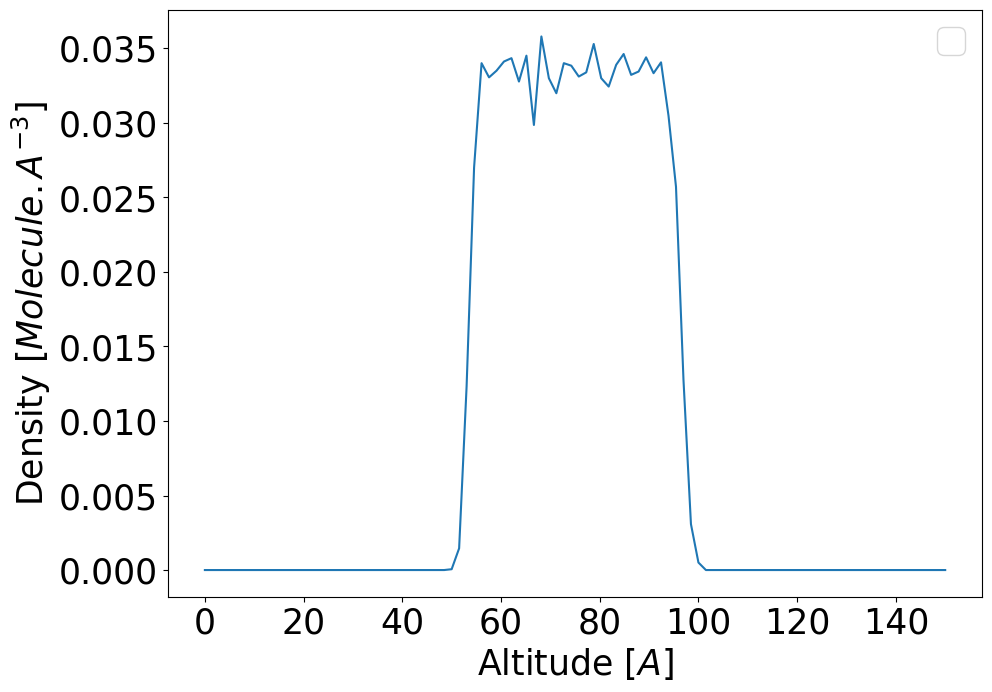

In [12]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value/GP.nbr_time_step)
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Density [$' + my_diagram.unit.print_unit() + ']$', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

To change the unit, use: `my_diagram.switch_unit_diagram`

You can change the unit of the axis_space. For instance to plot in nm instead of angstrom:

/tmp/ipykernel_105221/1047354797.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


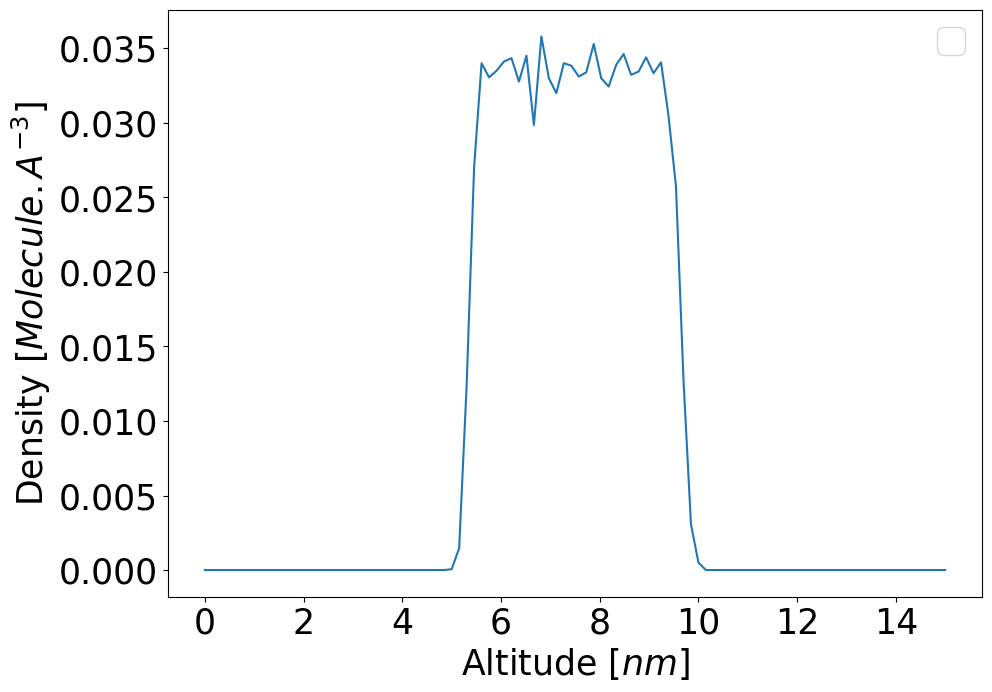

In [13]:
my_diagram.switch_unit_diagram('axis_space', 'length', 'nm', custom_change=False, molar_mass=False)

plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value/GP.nbr_time_step)
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Density [$' + my_diagram.unit.print_unit() + ']$', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

You can also change the unit of the distribution. This will change both the unit of the diagram, and the `axis_observable`. You have to change every component of the unit one by one. For instance for the density, to go from Molecule per angstrom^3 to kg per L (or dm^3), you have to change the `population` unit and the `length` unit. 

The `population` can be switch from Molecule to kg by:
```python
my_diagram.switch_unit_diagram('distribution', 'population', 'kg', custom_change=False, molar_mass=18)
```
Note that yu have to give the molar mass as well.

The `length` unit can be switch from 'nm' to 'dm' simply by: 
```python
my_diagram.switch_unit_diagram('distribution', 'length', 'dm')
```

/tmp/ipykernel_105221/1308733481.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


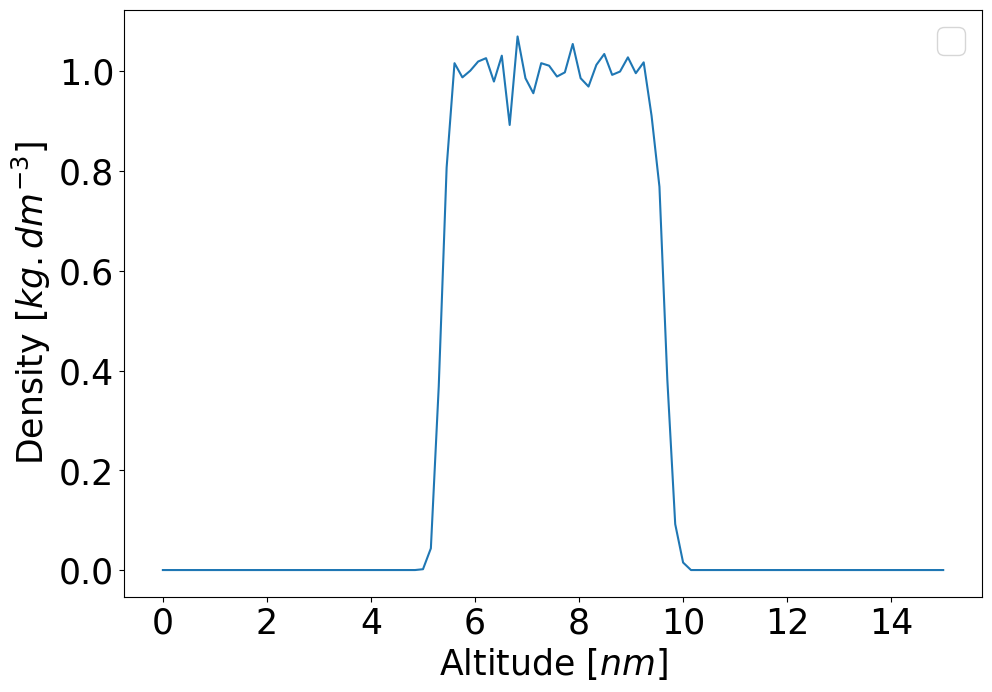

In [14]:
my_diagram.switch_unit_diagram('distribution', 'population', 'kg', custom_change=False, molar_mass=18)
my_diagram.switch_unit_diagram('distribution', 'length', 'dm')

plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value/GP.nbr_time_step)
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Density [$' + my_diagram.unit.print_unit() + ']$', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

/tmp/ipykernel_105221/3360500244.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


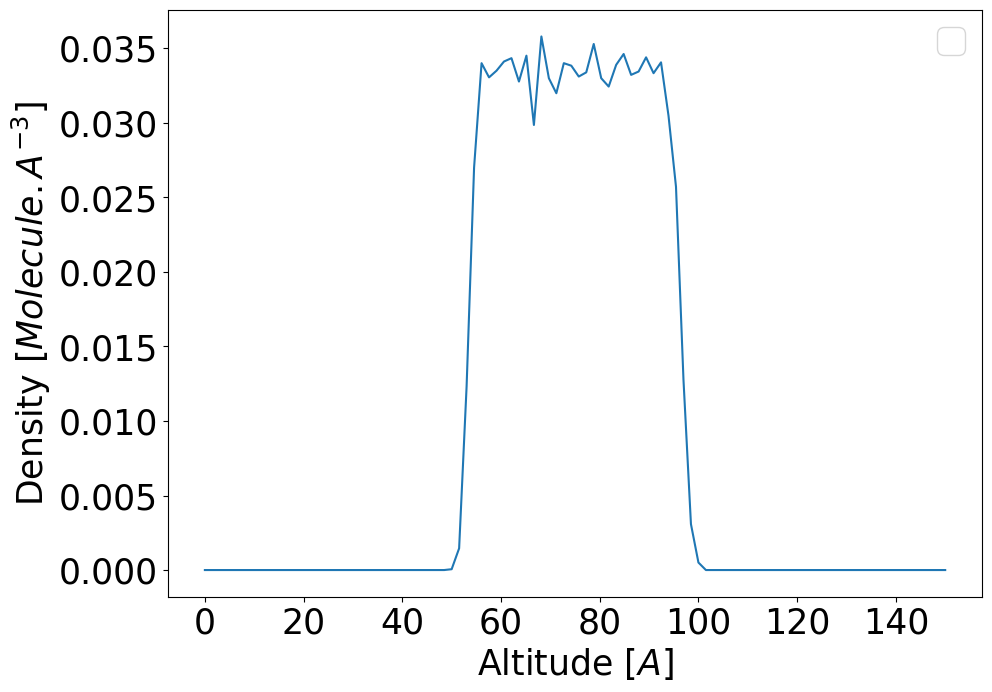

In [15]:
# To go back to the initial unit:
my_diagram.switch_unit_diagram('axis_space', 'length', 'A', custom_change=False, molar_mass=False)
my_diagram.switch_unit_diagram('distribution', 'population', 'Molecule', custom_change=False, molar_mass=18)
my_diagram.switch_unit_diagram('distribution', 'length', 'A')
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value/GP.nbr_time_step)
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Density [$' + my_diagram.unit.print_unit() + ']$', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

Please note that the unit formalism of Frog is not very develloped yet. Help is warmly welcome to improve it.

# Molecular Orientation

Let's analyse a more complexe set of data: the 'molecular orientation' of a molecule. 

The diagram contains 2 discretizations: the molecule's position and the molecule orientation. The space discretization is very similar to what has been presented above for the density analysis. For the molecule orientation, 3 floats have to be discretize corresponding to the projection of the water permanent dipole moment with respect to the laboratory axis. Note that the molecular orientation of a molecule is defined within its molecular library file. 

In [16]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'molecular_orientation_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

The `my_diagram.value` contains 3 dimensions. The first one is for the space discretization, the second for the molecular orientation (3 possibilites) and the last dimension contains the value of the molecular orientation. 

In [17]:
print('my_diagram.value.size', my_diagram.value.size) # here the size refers to an numpy attribute since my_diagram.value is a numpy diagram
print('my_diagram.size', my_diagram.size) # here it refers to the Frog attribute size of a diagram
print('The number of bin used for the space discretization is my_diagram.size[0]:', my_diagram.size[0])
print('There are my_diagram.size[1] angle used to defined the molecular orientation:', my_diagram.size[1])
print('The number of bin used for the each angle of the molecular orientation are my_diagram.size[2]:', my_diagram.size[2])

my_diagram.value.size 30000
my_diagram.size (100, 3, 100)
The number of bin used for the space discretization is my_diagram.size[0]: 100
There are my_diagram.size[1] angle used to defined the molecular orientation: 3
The number of bin used for the each angle of the molecular orientation are my_diagram.size[2]: 100


Below is show how the bin are attribute for a single molecule configuration: 

Let's say the molecule mean position is 89 A, and its molecular orientation is [-0.89, 0.1, 0.42]

In [18]:
# Example of discretization:
# space discretization:
z_mean_position = 89
nbr_bits = my_diagram.size[0] 
y_min = 0
y_max = GP.box_size[2]

bin_z = toolbox.binarize_array(z_mean_position, nbr_bits, y_min, y_max, pbc=False)
print('Box size along the z direction:', GP.box_size[2])
print('Number of bin to discretize the observable "mean position" along the z-axis:', my_diagram.size[0])
print('The mean position ' + str(z_mean_position) + ' correspond to the bin number:', bin_z)

# angle discretization
molecular_orientation =  np.array([-0.89, 0.1, 0.42])
nbr_bits = my_diagram.size[-1]
y_min = -1
y_max = 1

bin_angle = toolbox.binarize_array(molecular_orientation, nbr_bits, y_min, y_max, pbc=False)
print('Box size along the z direction:', GP.box_size[2])
print('Number of bin to discretize the observable "molecular orientation":', my_diagram.size[-1])
print('The molecular orientation ' + str(molecular_orientation) + ' correspond to the bin number:', bin_angle)

# Results:
print('This molecule will contribute to 3 values of the diagrams:', (bin_z, 0, bin_angle[0]), (bin_z, 1, bin_angle[1]), (bin_z, 2, bin_angle[2]))
print('The first bin number correspond to the space discretization (' + str(bin_z) + '), the second to the angle (0, 1 or 2) and the last to the angle value (' + str(bin_angle) + ').')

Box size along the z direction: 150.0
Number of bin to discretize the observable "mean position" along the z-axis: 100
The mean position 89 correspond to the bin number: 59
Box size along the z direction: 150.0
Number of bin to discretize the observable "molecular orientation": 100
The molecular orientation [-0.89  0.1   0.42] correspond to the bin number: [ 5 55 71]
This molecule will contribute to 3 values of the diagrams: (59, 0, np.int64(5)) (59, 1, np.int64(55)) (59, 2, np.int64(71))
The first bin number correspond to the space discretization (59), the second to the angle (0, 1 or 2) and the last to the angle value ([ 5 55 71]).


Since this kind of diagram have several dimension, here are some exemple to plot along some of them:

The plot is made for molecule at the altitude: 75.757576


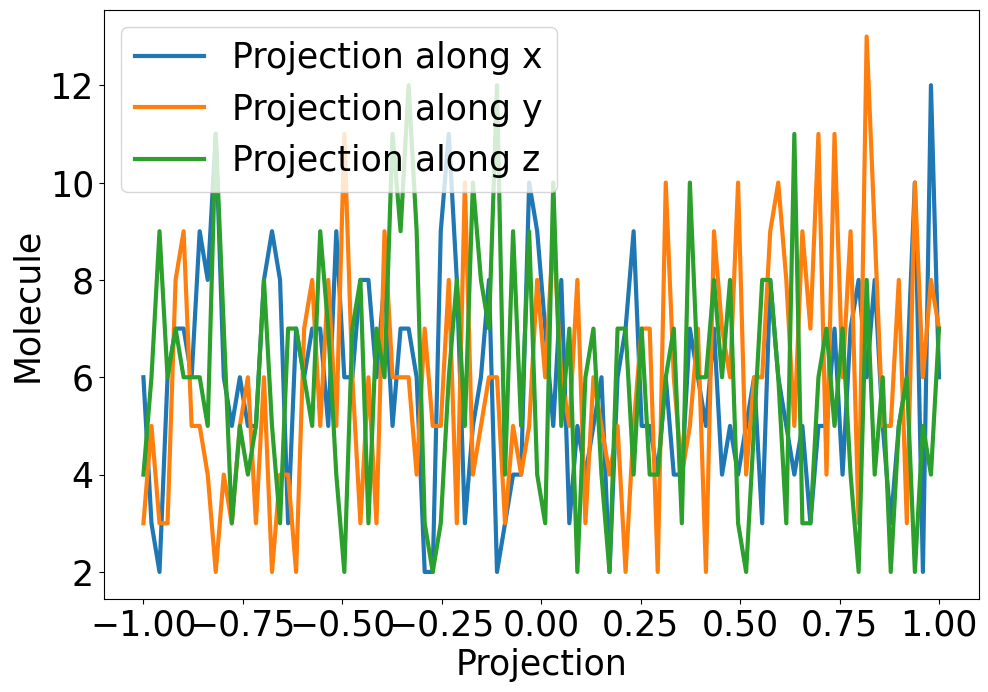

In [19]:
# To plot along the molecular angle at a given altitude, for all the possible angle:
bin_altitude = 50
print('The plot is made for molecule at the altitude:', my_diagram.axis_space.value[bin_altitude])

L_xyz = ['x', 'y', 'z']
plt.figure(1, figsize=(10, 7))
for k in range(3):
    plt.plot(my_diagram.axis_observable.value, my_diagram.value[bin_altitude][k], label='Projection along ' + L_xyz[k], lw=3)

plt.xlabel(my_diagram.axis_observable.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

The plot is made for molecule which dipole moment angle projection with the z-laboratory axis (the cos of this angle) is around 1.0


/tmp/ipykernel_105221/2842413593.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


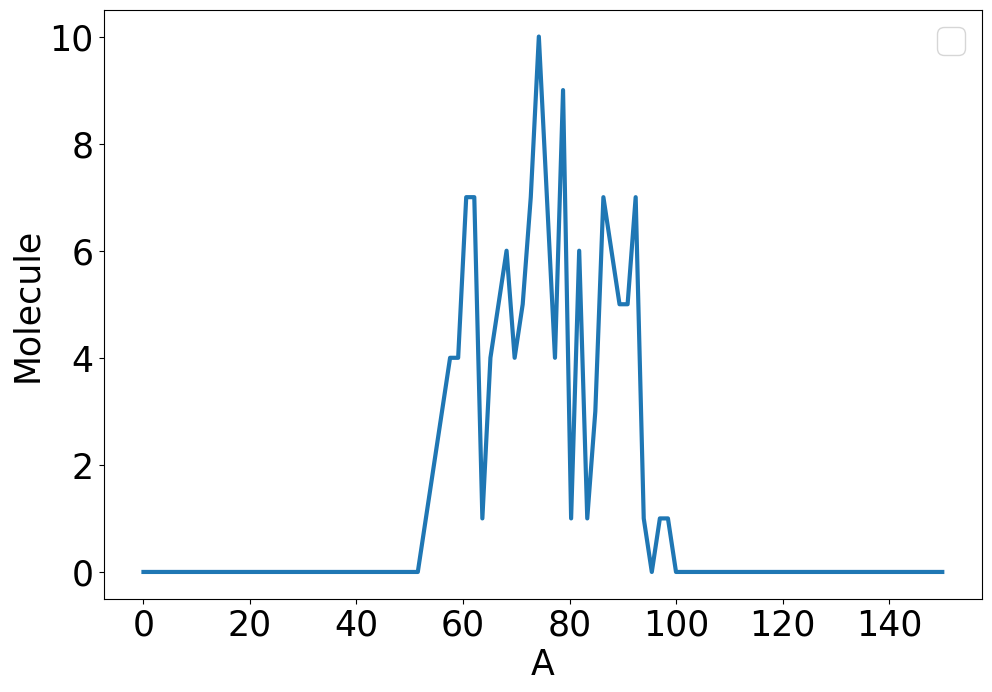

In [20]:
# To plot along the altitude one particular angle population:
L_xyz = ['x', 'y', 'z']
which_angle = 2
bin_angle = 99
print('The plot is made for molecule which dipole moment angle projection with the ' 
      + L_xyz[which_angle] + '-laboratory axis (the cos of this angle) is around ' 
      + str(my_diagram.axis_observable.value[bin_angle]))

plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value.T[bin_angle][which_angle], lw=3)

plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

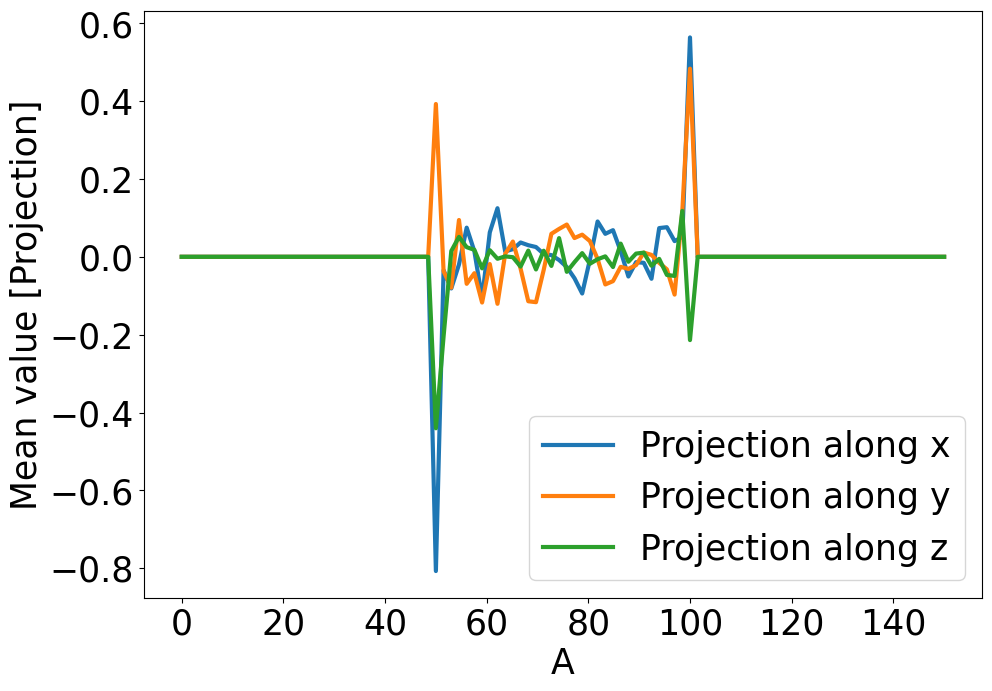

In [21]:
# To plot along the altitude the mean value of the projection for every angle:

L_xyz = ['x', 'y', 'z']
plt.figure(1, figsize=(10, 7))
for k in range(3):
    plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[k], label='Projection along ' + L_xyz[k], lw=3)

plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel('Mean value [' + my_diagram.axis_observable.unit.print_unit() +']', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

Please note that the average plotted above is already normalized with respect to the number of molecule participation to each altitude.
To see how many molecule have participated to each altitude, use: `my_diagram.axis_population`
This will help you determine which altitude make sens or not! 

Note that you can also use the density to do almost the same thing. This important point is that this `my_diagram.axis_population` respect the same space discretization as the one used for the diagram!  

/tmp/ipykernel_105221/4118312381.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=25)


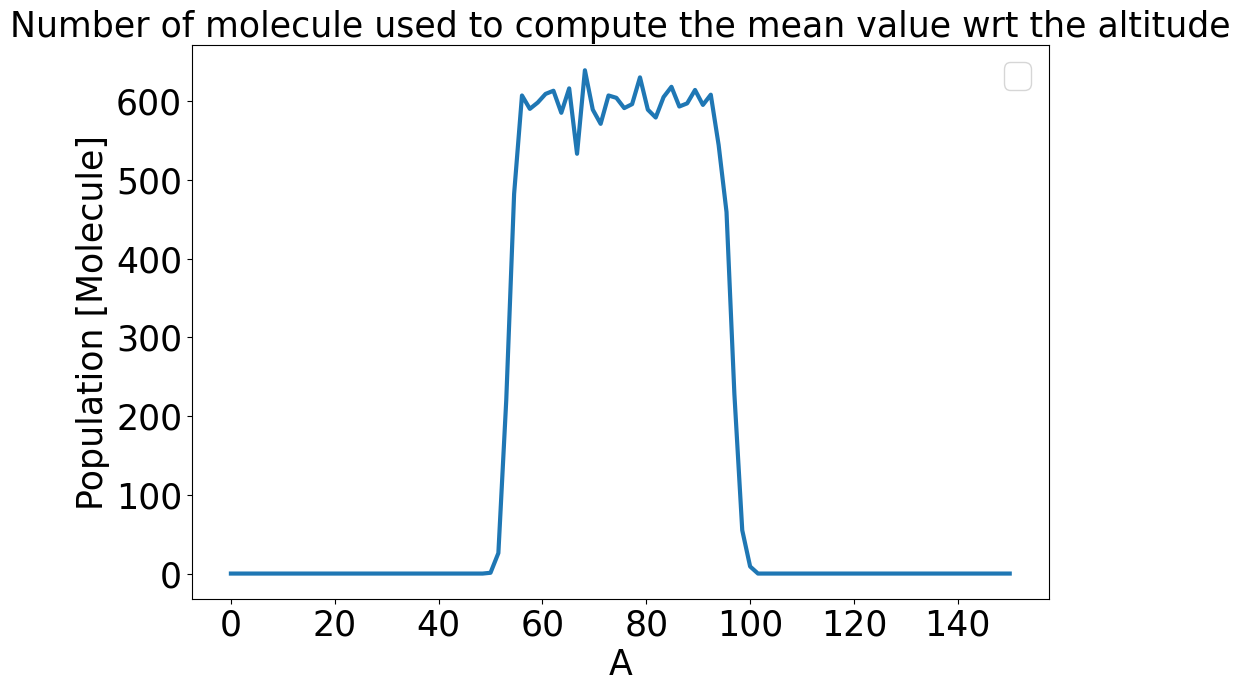

In [22]:
# To plot the number of molecule which have participated to each altitude for this diagram: 
plt.figure(1, figsize=(10, 7))
plt.title('Number of molecule used to compute the mean value wrt the altitude', fontsize=25)
plt.plot(my_diagram.axis_space.value, my_diagram.axis_population, lw=3)
plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel('Population [Molecule]', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

If enough time step are used, you can also used an estimation of the error using `my_diagram.sd`. See the main documentation for more details. 

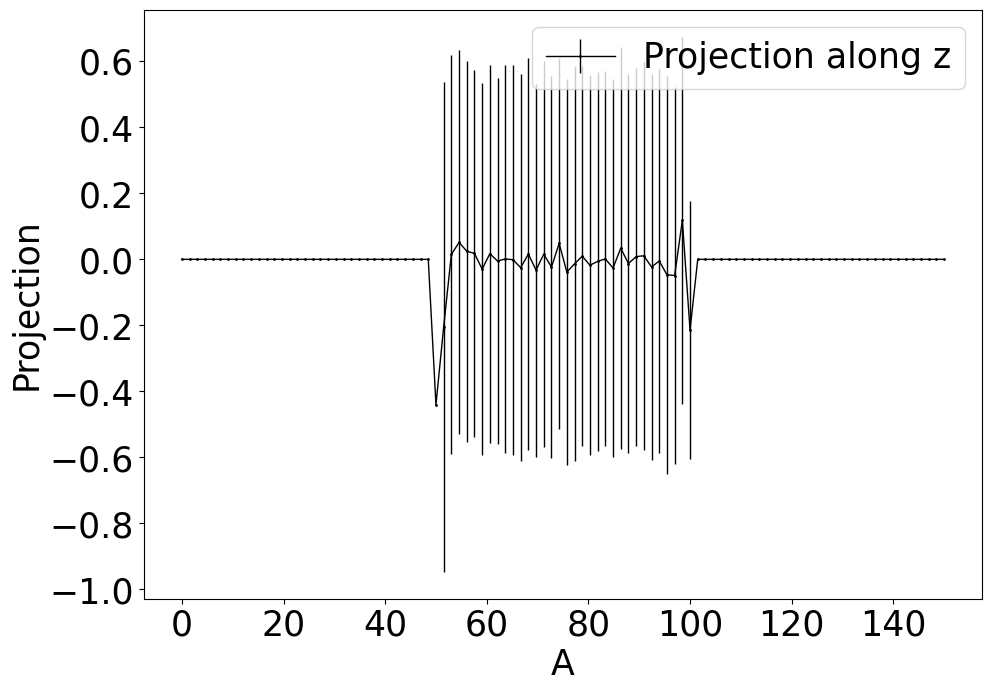

In [23]:
k = 2

plt.figure(1, figsize=(10, 7))
plt.errorbar(my_diagram.axis_space.value, my_diagram.mean.T[k], yerr=my_diagram.sd.T[0], label='Projection along ' + L_xyz[k], 
             fmt = 'k', marker='o', mfc='k', ms=1, mew=1, linewidth=1)
plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.axis_observable.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


# Chi

For the other analysis type, it is more or less the same. For instance, for the chi analysis, the output is a 27 elements tensor (instead of 3 elements list of the molecular orientation).
Therefore, the size of the diagram will be Nx27xM, with N the number of bin to discretize the space and M the number of bin used to discretize each elements. 

In [24]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'chi_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

Here, the elements values can goes from -inf to + inf in principle. Therefore, the extremum value have been passed in input, and are stored in : `my_diagram_sdparameter.min_max`
For instance: 

In [25]:
# Loading the diagram
MT_name = 'Water_TIP4P2005'
name_diagram = 'chi_slice_z'

# To have access to its diagram parameter object:
for KKK in range(0, len(L_moleculetype_result), 1): # finding the MT 
    if L_moleculetype_result[KKK].name == MT_name:
        K_MT = KKK

for k in range(0, len(L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram), 1): # finding the sdparameter relative to the diagram asked
    diagram_name = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k].name
    if diagram_name == name_diagram:
        my_diagram_sdparameter = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k]

print('Here is the sdparameter:', type(my_diagram_sdparameter), my_diagram_sdparameter.name)

# You can then show some properties of the sdparameter:
print('sdparameter min-max value used for each element discretization:', my_diagram_sdparameter.min_max, 'unit: ' + my_diagram.axis_observable.unit.print_unit())
print('To discretize each elements, M bin are used:', my_diagram_sdparameter.bin_size[-1])
print('Therefore, each bin for the element value widith is: ', (my_diagram_sdparameter.min_max[1]-my_diagram_sdparameter.min_max[0])/my_diagram_sdparameter.bin_size[-1], 'unit: ' + my_diagram.axis_observable.unit.print_unit())


Here is the sdparameter: <class 'Frog.class_DiagramParameter.SingleDiagramParameter'> chi_slice_z
sdparameter min-max value used for each element discretization: [-10, 10] unit: a.u.
To discretize each elements, M bin are used: 50
Therefore, each bin for the element value widith is:  0.4 unit: a.u.


The `my_diagram.axis_observable.value` go troughout these extremal values using M bins. 

The plot is made for molecule at the altitude: 90.90909


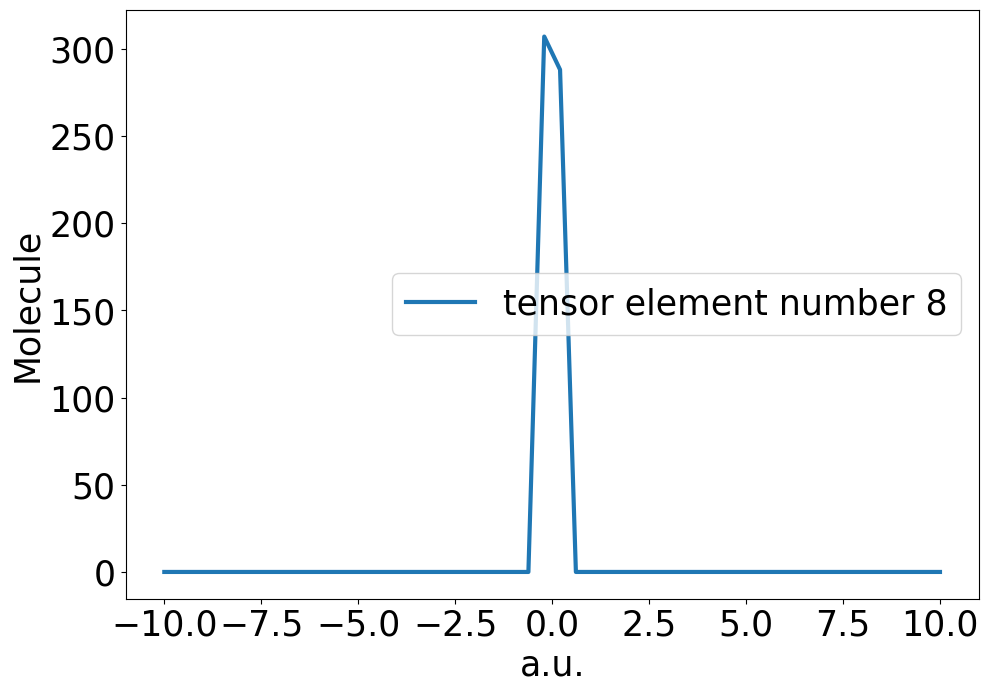

In [26]:
# To plot the distribution of the K tensor elements at a given altitude:
K = 8
bin_altitude = 60
print('The plot is made for molecule at the altitude:', my_diagram.axis_space.value[bin_altitude])

plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_observable.value, my_diagram.value[bin_altitude][K], label='tensor element number '  + str(K), lw=3)
plt.xlabel(my_diagram.axis_observable.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

Today, the mean value is stored differently to the distribution.

The `diagram.value` has 27 elements, and is stored from 0 to 26.
The `diagram.mean` has 3x3x3 elements. 

To go from one to another:
`diagram.mean[i][j][k]` corresponds to the i*9+j*3+k element of `diagram.value`

Note: if you are using diagram.mean.T, note that the order changes!!!!
```python
diagram.mean[i][j][k][l] = diagram.mean.T[l][k][j][i]
```

The tensor element yxz correspond to the 11th element in the distribution


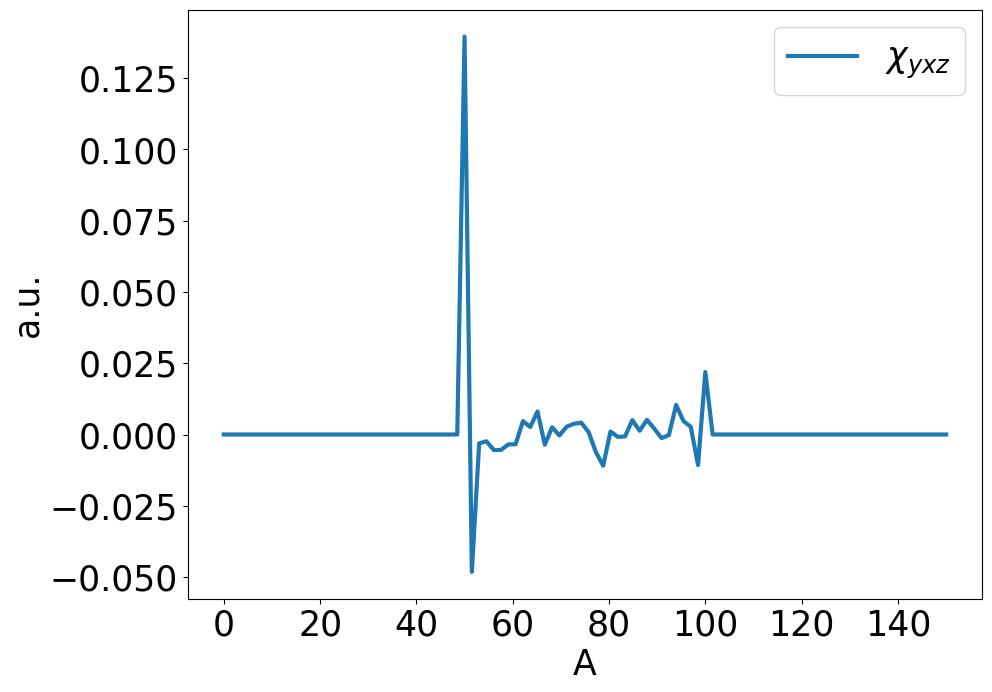

In [27]:
# To plot the mean value of the K tensor elements for every altitude
L_xyz = ['x', 'y', 'z']
iii = 1
jjj = 0
kkk = 2

name_ijk = L_xyz[iii] + L_xyz[jjj] + L_xyz[kkk]
number_element_diagram = iii*9+jjj*3+kkk
print('The tensor element ' + name_ijk + ' correspond to the ' + str(number_element_diagram) + 'th element in the distribution')

plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[kkk][jjj][iii], label=r'$\chi_{' + name_ijk + '}$', lw=3)
plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.axis_observable.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

The tensor element yxz correspond to the 11th element in the distribution


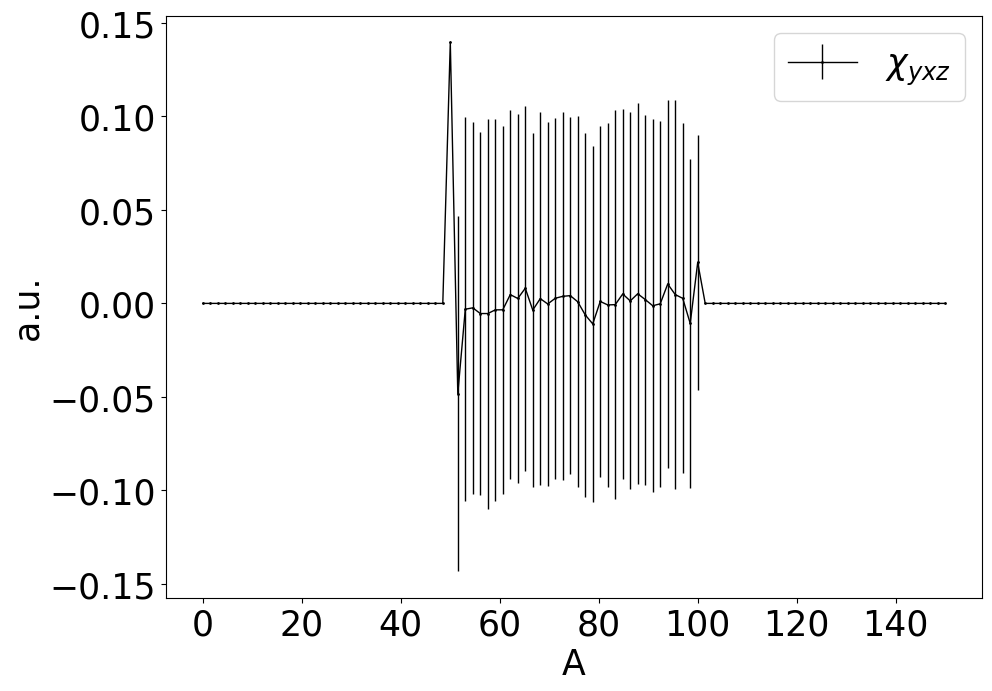

In [28]:
# To plot the mean value of the K tensor elements for every altitude
L_xyz = ['x', 'y', 'z']
iii = 1
jjj = 0
kkk = 2

name_ijk = L_xyz[iii] + L_xyz[jjj] + L_xyz[kkk]
number_element_diagram = iii*9+jjj*3+kkk
print('The tensor element ' + name_ijk + ' correspond to the ' + str(number_element_diagram) + 'th element in the distribution')

plt.figure(1, figsize=(10, 7))
plt.errorbar(my_diagram.axis_space.value, my_diagram.mean.T[kkk][jjj][iii], yerr=my_diagram.sd.T[kkk][jjj][iii], label=r'$\chi_{' + name_ijk + '}$', 
             fmt = 'k', marker='o', mfc='k', ms=1, mew=1, linewidth=1)
plt.xlabel(my_diagram.axis_space.unit.print_unit(), fontsize=25)
plt.ylabel(my_diagram.axis_observable.unit.print_unit(), fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)



Note that the mean value is made without any binarization error. If you can to perform the average by yourself:

$<X> = 1/N \sum \rho(X)*X$

Here, X is `my_diagram.axis_observable.value` and the distribution rho(X) is `my_diagram.value`. The number of molecule N is `my_diagram.axis_population`

In [29]:
# Averaging of the first element at the 50th altitude :
bin_z = 50
iii = 0
jjj = 0
kkk = 0
name_ijk = L_xyz[iii] + L_xyz[jjj] + L_xyz[kkk]
number_element_diagram = iii*9+jjj*3+kkk
print('mean value of the first element at the ' + str(bin_z) + 'th altitude computed directly by Frog:', my_diagram.mean[bin_z][iii][jjj][kkk])

print('Number of molecule at this altitude:', my_diagram.axis_population[bin_z], np.sum(my_diagram.value[50][number_element_diagram]))
my_mean = np.sum(my_diagram.value[bin_z][number_element_diagram]*my_diagram.axis_observable.value)/my_diagram.axis_population[bin_z]

print('Obtained mean: ', my_mean)

print('The difference between the 2 method can be explained by the binarized error.' + 
      ' If too few bins to discretize the observable (M) are used, the distribution loses some information.' + 
      ' Therefore, the mean value is not exactly computed.' +
      ' To reduce this error, increase M or reduce the min-max value used.')

mean value of the first element at the 50th altitude computed directly by Frog: -0.003058397667751354
Number of molecule at this altitude: 591.0 591.0
Obtained mean:  -0.00448910528678467
The difference between the 2 method can be explained by the binarized error. If too few bins to discretize the observable (M) are used, the distribution loses some information. Therefore, the mean value is not exactly computed. To reduce this error, increase M or reduce the min-max value used.
